In [1]:
import nltk
nltk.download('punkt')


[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [2]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import tensorflow
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS # wordcloud is used to generate a visual representation of word clouds depending the frequency of the word
import re # used for string searching and manipulation
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import gensim
from gensim.utils import simple_preprocess # it is used to tokenize words and convert them to lowercase
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models import word2vec #word2vec is a model which is used for word embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences # it helps to ensure that the input sequences are of same length
from tensorflow.keras.models import Sequential # it is used to create a pipeline i.e. a stack of layers where data moves from one layer to another layer
from tensorflow.keras.layers import Dense, Flatten,Embedding, TimeDistributed, RepeatVector, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme to ensure that we are able to see the x and the y clearly.

In [4]:
# loading the data
df_english = pd.read_csv('small_vocab_en.csv', sep='/l', header=None, names=['english'])
df_french = pd.read_csv("small_vocab_fr.csv", sep='/l', header=None, names=['french'])
print(df_english, df_french)

C:\Users\charles\AppData\Local\Temp\ipykernel_560\857587416.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_english = pd.read_csv('small_vocab_en.csv', sep='/l', header=None, names=['english'])
C:\Users\charles\AppData\Local\Temp\ipykernel_560\857587416.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_french = pd.read_csv("small_vocab_fr.csv", sep='/l', header=None, names=['french'])


                                                  english
0       new jersey is sometimes quiet during autumn , ...
1       the united states is usually chilly during jul...
2       california is usually quiet during march , and...
3       the united states is sometimes mild during jun...
4       your least liked fruit is the grape , but my l...
...                                                   ...
137855  france is never busy during march , and it is ...
137856  india is sometimes beautiful during spring , a...
137857  india is never wet during summer , but it is s...
137858  france is never chilly during january , but it...
137859  the orange is her favorite fruit , but the ban...

[137860 rows x 1 columns]                                                    french
0       new jersey est parfois calme pendant l' automn...
1       les états-unis est généralement froid en juill...
2       california est généralement calme en mars , et...
3       les états-unis est parfois légère en 

In [5]:
# concatenation of the dataframe
df = pd.concat([df_english, df_french], axis=1, )
df

english  \
0       new jersey is sometimes quiet during autumn , ...   
1       the united states is usually chilly during jul...   
2       california is usually quiet during march , and...   
3       the united states is sometimes mild during jun...   
4       your least liked fruit is the grape , but my l...   
...                                                   ...   
137855  france is never busy during march , and it is ...   
137856  india is sometimes beautiful during spring , a...   
137857  india is never wet during summer , but it is s...   
137858  france is never chilly during january , but it...   
137859  the orange is her favorite fruit , but the ban...   

                                                   french  
0       new jersey est parfois calme pendant l' automn...  
1       les états-unis est généralement froid en juill...  
2       california est généralement calme en mars , et...  
3       les états-unis est parfois légère en juin , et...  
4       votre moins aimé fruit est le raisin , mais mo...  
...                                                   ...  
137855  la france est jamais occupée en mars , et il e...  
137856  l' inde est parfois belle au printemps , et il...  
137857  l' inde est jamais mouillé pendant l' été , ma...  
137858  la france est jamais froid en janvier , mais i...  
137859  l'orange est son fruit préféré , mais la banan...  

[137860 rows x 2 columns]

In [6]:
df.shape

(137860, 2)

In [7]:
df.describe()

english  \
count                                           137860   
unique                                          129174   
top     he dislikes pears , strawberries , and limes .   
freq                                                 3   

                                                   french  
count                                              137860  
unique                                             120806  
top     elle aime les bananes , citrons verts et les m...  
freq                                                    6

from count i can conclude that i have no missing values inside my dataframe

## Data Cleaning

In [8]:
# removing punctuations so that i will not have diffrent forms of the same word
import string
def remove_punct(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [9]:
df['english'] = df['english'].apply(remove_punct)
df['french'] =  df['french'].apply(remove_punct)

In [10]:
# it is clear now that the puctuations have been removed from the dataframe
df

english  \
0       new jersey is sometimes quiet during autumn  a...   
1       the united states is usually chilly during jul...   
2       california is usually quiet during march  and ...   
3       the united states is sometimes mild during jun...   
4       your least liked fruit is the grape  but my le...   
...                                                   ...   
137855  france is never busy during march  and it is s...   
137856  india is sometimes beautiful during spring  an...   
137857  india is never wet during summer  but it is so...   
137858  france is never chilly during january  but it ...   
137859  the orange is her favorite fruit  but the bana...   

                                                   french  
0       new jersey est parfois calme pendant l automne...  
1       les étatsunis est généralement froid en juille...  
2       california est généralement calme en mars  et ...  
3       les étatsunis est parfois légère en juin  et i...  
4       votre moins aimé fruit est le raisin  mais mon...  
...                                                   ...  
137855  la france est jamais occupée en mars  et il es...  
137856  l inde est parfois belle au printemps  et il e...  
137857  l inde est jamais mouillé pendant l été  mais ...  
137858  la france est jamais froid en janvier  mais il...  
137859  lorange est son fruit préféré  mais la banane ...  

[137860 rows x 2 columns]

In [11]:
english_words = []
french_words = []

english_lines = []
french_lines = []

In [12]:
# number of unique word in english
for line in df['english'][:]:
    english_lines.append(line)
    
    for word_eng in line.split(' '):
        english_words.append(word_eng)
        
# number of unique words in french
for line in df['french'][:]:
    french_lines.append(line)
    
    for word_fre in line.split(' '):
        french_words.append(word_fre)
    

In [13]:
print("unique english words",len(set(english_words)))
print("unique french words" ,len(set(french_words)))

eng_vocab_size = len(set(english_words))
french_vocab_size = len(set(french_words))

unique english words 200
unique french words 346


In [14]:
# frequency of a word in the english dataset
from collections import Counter
english_words_counts = Counter(sorted(english_words, reverse=False))
english_words_counts

Counter({'': 270789,
         'a': 1944,
         'am': 24,
         'and': 59850,
         'animal': 2304,
         'animals': 768,
         'apple': 4848,
         'apples': 5844,
         'april': 8954,
         'are': 870,
         'arent': 36,
         'august': 8789,
         'automobile': 1944,
         'autumn': 9004,
         'banana': 4848,
         'bananas': 5844,
         'bear': 192,
         'bears': 64,
         'beautiful': 8915,
         'been': 36,
         'between': 540,
         'big': 1016,
         'bird': 192,
         'birds': 64,
         'black': 972,
         'blue': 972,
         'busy': 8791,
         'but': 63987,
         'california': 11250,
         'car': 1944,
         'cat': 192,
         'cats': 64,
         'chilly': 8770,
         'china': 10953,
         'chinese': 312,
         'cold': 8878,
         'december': 8945,
         'did': 204,
         'didnt': 60,
         'difficult': 260,
         'dislike': 4444,
         'disliked': 648,
     

# visualization of english word

In [15]:
# drawing a bar graph of the english word frequency
english_word = []
english_fre_word = []
for key, value in english_words_counts.items():
    english_word.append(key)
    english_fre_word.append(value)
    
x = english_word
y = english_fre_word


import plotly.express as px
# Plot barplot using plotly 
fig = px.bar(x = english_word, y = english_fre_word)
fig.show()

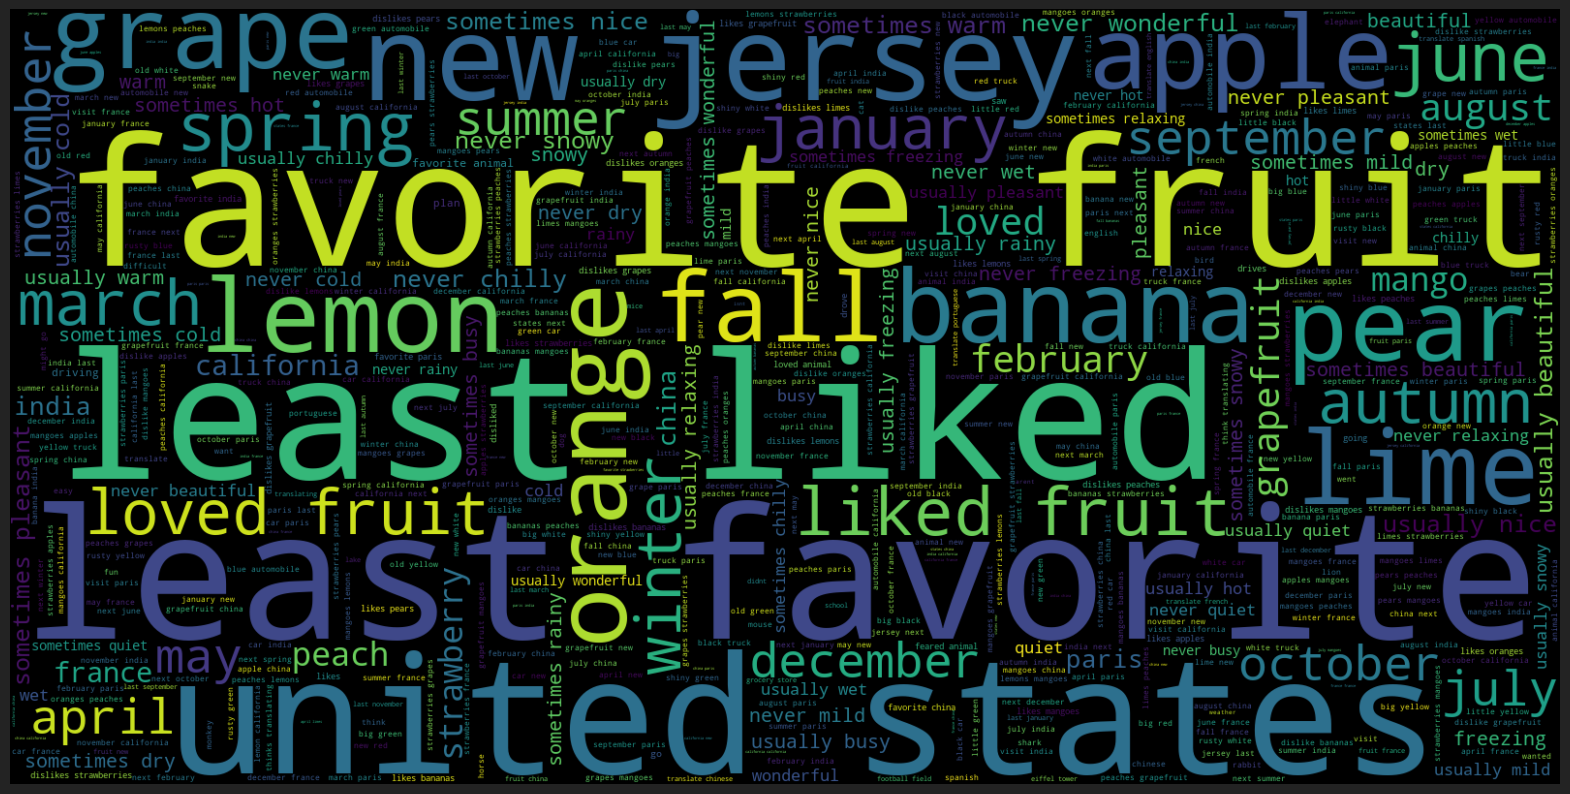

In [16]:
# visualizing with the real words

import matplotlib.pyplot as plt

# Create a new figure using the 'plt.figure' function


# Create and display the word cloud
plt.figure(figsize=(20,20))
wordcloud = WordCloud(max_words=2000, width=1600, height=800).generate(" ".join(df['english']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Turn off axis numbers and ticks
plt.show()

In [17]:
# creating a column which will hold the tokens for the english and french
df['eng_tokens'] = df['english'].apply(word_tokenize)
df['french_tokens'] = df['french'].apply(word_tokenize)

# creating a column which will hold the number of tokens in a doc
df['num_words_eng'] = df['eng_tokens'].apply(len)
df['num_words_french'] = df['french_tokens'].apply(len)

# finding the columns which hold this maximum number of tokens
eng_sent_max_loc = np.where(df['num_words_eng'] == max(df['num_words_eng']))
fre_sent_max_loc = np.where(df['num_words_french'] == max(df['num_words_french']))

In [18]:
df.iloc[eng_sent_max_loc].describe()

num_words_eng  num_words_french
count         6058.0       6058.000000
mean            15.0         14.855563
std              0.0          1.078756
min             15.0         12.000000
25%             15.0         14.000000
50%             15.0         15.000000
75%             15.0         16.000000
max             15.0         20.000000

In [19]:
df.iloc[fre_sent_max_loc].describe()

num_words_eng  num_words_french
count       2.000000               2.0
mean       13.500000              21.0
std         0.707107               0.0
min        13.000000              21.0
25%        13.250000              21.0
50%        13.500000              21.0
75%        13.750000              21.0
max        14.000000              21.0

In [20]:
maxlen_eng = max(df['num_words_eng'])
maxlen_eng

15

In [21]:
maxlen_french = max(df['num_words_french'])
maxlen_french

21

# visualization of french words


In [22]:
from collections import Counter
french_words_counts = Counter(sorted(french_words))

french_word = []
french_fre_word = []
for k, v in french_words_counts.items():
    french_word.append(k)
    french_fre_word.append(v)
    
x = french_word
y = french_fre_word
import plotly.express as px
fig = px.bar(x = french_word, y = french_fre_word)
fig.show()



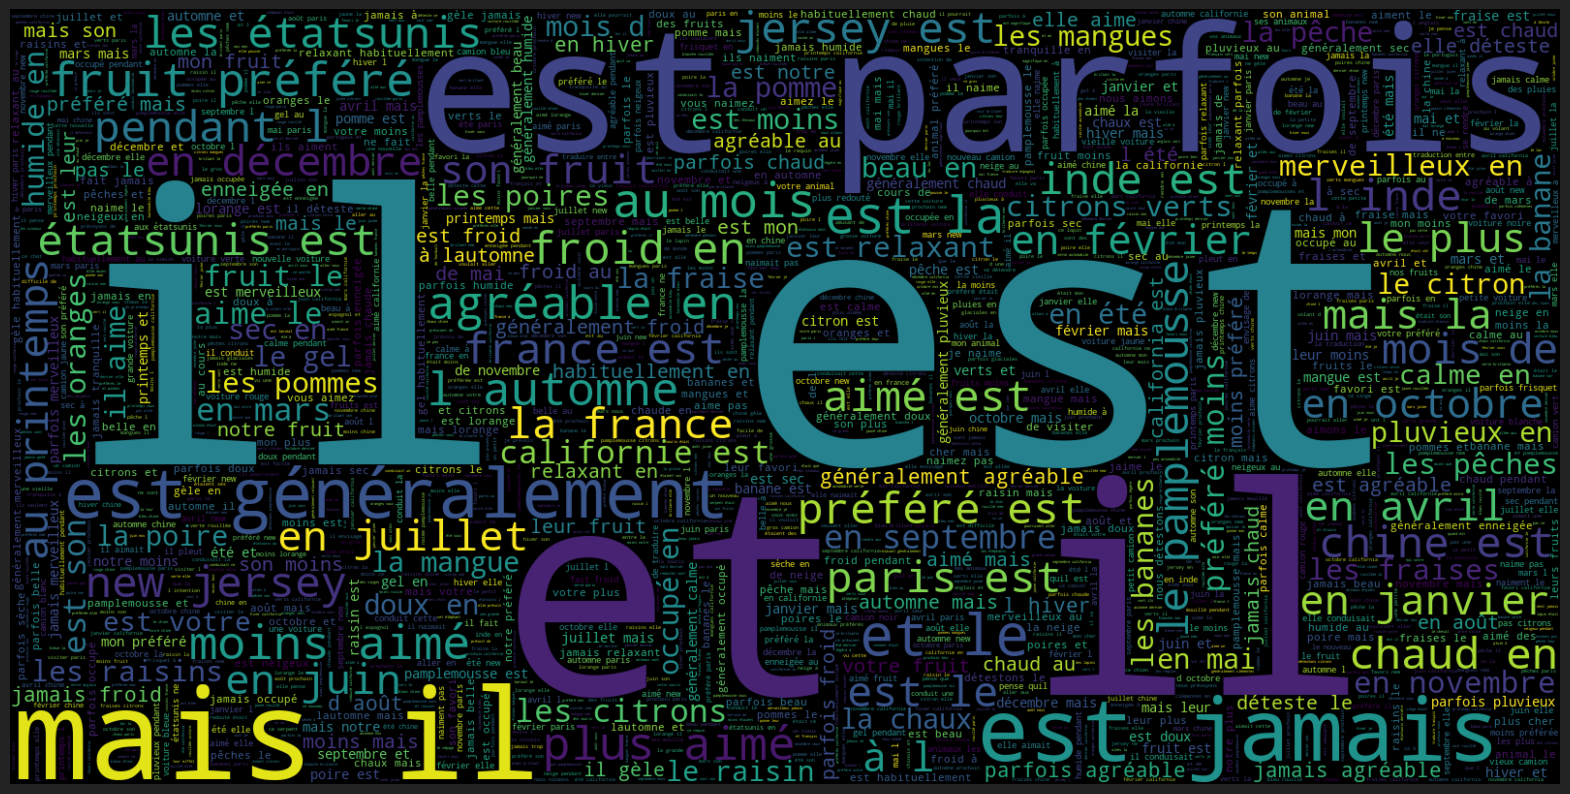

In [23]:
# visualizing with the real words

import matplotlib.pyplot as plt

# Create a new figure using the 'plt.figure' function


# Create and display the word cloud
plt.figure(figsize=(20,20))
wordcloud = WordCloud(max_words=2000, width=1600, height=800).generate(" ".join(df['french']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Turn off axis numbers and ticks
plt.show()

# tokenization and padding

because am buuiding a neural network using keras tokenization with keras will be more suitable rather than using tokenization in nltk library

In [24]:
# tokenization and padding
def tokenize_and_pad(sentences, maxlen):
    # tokenization
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(sentences)
    tokenized_sequences = tokenizer.texts_to_sequences(sentences)
    
    #padding
    padded_sequences = pad_sequences(tokenized_sequences, maxlen=maxlen, padding='post')
    
    return tokenizer, tokenized_sequences, padded_sequences

In [25]:
# x_tokenizer it will hold the tokenizer that was used to tokenizer that was used to tokenize the text
# x_sequences it contains the tokenized sequences of the senteces
# x_padded the padded sequences of the texts

x_tokenizer, x_sequences, x_padded = tokenize_and_pad(sentences = df['english'], maxlen=maxlen_eng)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(sentences = df['french'], maxlen=maxlen_french)


In [26]:
# the tokenized version of the english word

In [27]:
df['english'][0]

'new jersey is sometimes quiet during autumn  and it is snowy in april '

In [28]:
x_padded[0]

array([17, 23,  1,  8, 67,  4, 39,  7,  3,  1, 55,  2, 44,  0,  0])

In [29]:
# the tokenized version of the french word

In [30]:
df.french[0]

'new jersey est parfois calme pendant l automne  et il est neigeux en avril '

In [31]:
y_padded[0]

array([ 34,  33,   1,   8,  66,  36,  11,  24,   6,   3,   1, 111,   2,
        49,   0,   0,   0,   0,   0,   0,   0])

In [32]:
# train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_padded, y_padded, test_size=0.2)

In [33]:
x_train.shape

(110288, 15)

In [34]:
x_test.shape

(27572, 15)

In [35]:
y_train.shape

(110288, 21)

In [36]:
y_test.shape

(27572, 21)

In [37]:
# sequential model
model = Sequential()
# embedding layer
# at first i had used word2vec to obtain word embedding for the tokens, now am adding embedding layer so that i can use the pre-trained word2vec embedding, this is known as transfer learning
model.add(Embedding(eng_vocab_size, 256, input_length = maxlen_eng, mask_zero=True)) # mask_zer0=True masks the zero padding during training to prevent them from influencing the model's training

#encoder #256 are the number of lstm cells in the encoder
model.add(LSTM(256))

# decoder
# repeatvector repeats the input for the desired number of times to change
# 2D-array to 3D array. For example: (1,256) to (1,23,256)
model.add(RepeatVector(maxlen_french))
model.add(LSTM(256, return_sequences=True))
model.add(TimeDistributed(Dense(french_vocab_size, activation='softmax')))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 256)           51200     
                                                                 
 lstm (LSTM)                 (None, 256)               525312    
                                                                 
 repeat_vector (RepeatVector  (None, 21, 256)          0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 21, 256)           525312    
                                                                 
 time_distributed (TimeDistr  (None, 21, 346)          88922     
 ibuted)                                                         
                                                                 
Total params: 1,190,746
Trainable params: 1,190,746
Non-

In [38]:
# changing the y_train from 2d to 3d since i had used repeateVector which converted my input from 2d to 3d.
y_train = np.expand_dims(y_train, axis=2)
y_train.shape

(110288, 21, 1)

In [98]:
# function to obtain the text from padded variables
def pad_to_text(padded, tokenizer):

    id_to_word = {id: word for word, id in tokenizer.word_index.items()}
    id_to_word[0] = ''

    return ' '.join([id_to_word[j] for j in padded])

pad_to_text(y_padded[0], y_tokenizer)

'new jersey est parfois calme pendant l automne et il est neigeux en avril       '

In [53]:
# train the model
model.fit(x_train, y_train, batch_size=1024, validation_split= 0.1, epochs=10)

Epoch 1/10
97/97 [==============================] - 321s 3s/step - loss: 2.9558 - accuracy: 0.4483 - val_loss: 2.3364 - val_accuracy: 0.5017
Epoch 2/10
97/97 [==============================] - 314s 3s/step - loss: 2.0879 - accuracy: 0.5284 - val_loss: 1.8183 - val_accuracy: 0.5570
Epoch 3/10
97/97 [==============================] - 312s 3s/step - loss: 1.6778 - accuracy: 0.5786 - val_loss: 1.5605 - val_accuracy: 0.5921
Epoch 4/10
97/97 [==============================] - 317s 3s/step - loss: 1.4864 - accuracy: 0.6049 - val_loss: 1.3852 - val_accuracy: 0.6247
Epoch 5/10
97/97 [==============================] - 316s 3s/step - loss: 1.3085 - accuracy: 0.6327 - val_loss: 1.2318 - val_accuracy: 0.6474
Epoch 6/10
97/97 [==============================] - 315s 3s/step - loss: 1.1628 - accuracy: 0.6643 - val_loss: 1.0795 - val_accuracy: 0.6874
Epoch 7/10
97/97 [==============================] - 308s 3s/step - loss: 1.0252 - accuracy: 0.7021 - val_loss: 0.9581 - val_accuracy: 0.7220
Epoch 8/10
97

In [54]:
model.save("english2french.h5")

# evaluating the saved model performance

In [1]:
from keras.models import load_model
model = load_model('english2french.h5')

In [39]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"loss: {loss}, Accuracy: {accuracy}")

862/862 [==============================] - 89s 97ms/step - loss: 5.8458 - accuracy: 0.0017
loss: 5.845773696899414, Accuracy: 0.0016839029267430305


# doing prediction using my model

In [57]:
sentences = [
    "i am, evans njoroge?",
    "Hey, how are you?",
    "hope your day was fine!!!!!"
]

In [77]:
preprocessed_sentences = []
for sentence in sentences:
    sentence = remove_punct(sentence)
    preprocessed_sentences.append(sentence)

In [92]:
x_tokenizer, x_sequences, x_padded = tokenize_and_pad(sentences = preprocessed_sentences, maxlen=maxlen_eng)
x_padded

array([[ 1,  2,  3,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  6,  7,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 9, 10, 11, 12, 13,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [94]:
prediction = model.predict(x_padded)
prediction

1/1 [==============================] - 0s 39ms/step


array([[[0.00289287, 0.00288886, 0.00289206, ..., 0.00288902,
         0.00288545, 0.00289641],
        [0.00289501, 0.00288795, 0.00289377, ..., 0.00288723,
         0.00288212, 0.00290119],
        [0.00289674, 0.00288731, 0.00289524, ..., 0.00288524,
         0.00287978, 0.0029049 ],
        ...,
        [0.00290394, 0.00288479, 0.00289947, ..., 0.00287301,
         0.00287391, 0.00291787],
        [0.00290398, 0.00288474, 0.00289945, ..., 0.00287294,
         0.00287387, 0.0029179 ],
        [0.00290402, 0.00288469, 0.00289943, ..., 0.00287289,
         0.00287384, 0.00291793]],

       [[0.00288898, 0.0028941 , 0.00288852, ..., 0.00289292,
         0.00289328, 0.00289265],
        [0.00288779, 0.00289635, 0.00288724, ..., 0.00289457,
         0.00289577, 0.00289437],
        [0.00288677, 0.00289757, 0.00288623, ..., 0.00289547,
         0.00289774, 0.00289557],
        ...,
        [0.00288482, 0.00289879, 0.00288274, ..., 0.00289497,
         0.00290441, 0.00289876],
        [0.0

In [102]:
# function to make prediction
def prediction(x, x_tokenizer = x_tokenizer, y_tokenizer = y_tokenizer):
    predictions = model.predict(x)[0]
    id_to_word = {id: word for word, id in y_tokenizer.word_index.items()}
    id_to_word[0] = ''
    return ' '.join([id_to_word[j] for j in np.argmax(predictions,1)])

In [114]:
for i in range(5):
    print('Original French word - {}\n'.format(pad_to_text(y_test[i], y_tokenizer)))
    print('Predicted French word - {}\n\n\n\n'.format(prediction(x_test[i:i+1])))

Original French word - paris est chaud en automne et il est relaxant habituellement en avril         

1/1 [==============================] - 0s 35ms/step
Predicted French word - redoutés jaime jaime jaime jaime jaime jaime jaime jaime jaime jaime jaime jaime jaime jaime jaime jaime jaime jaime jaime jaime




Original French word - les étatsunis est froid en octobre mais il est parfois occupé en septembre        

1/1 [==============================] - 0s 32ms/step
Predicted French word - difficile difficile difficile difficile difficile difficile difficile difficile difficile sont sont sont sont sont sont sont sont sont sont sont sont




Original French word - je pense quil est amusant de traduire espagnol portugais            

1/1 [==============================] - 0s 31ms/step
Predicted French word - juin juin juin juin juin juin juin juin juin juin juin juin juin juin juin juin juin juin juin juin juin




Original French word - les étatsunis est parfois glaciales en février et 